# AI - ACM SummerSchool - Task3

## Part2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#2.1
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
df = pd.DataFrame(np.c_[X, y], columns=np.append(iris['feature_names'], ['target']))
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


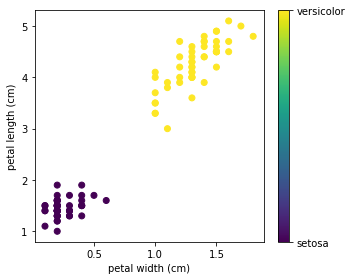

In [4]:
#2.2
from matplotlib import pyplot as plt


dff = df[df['target'] != 2]
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(dff['petal width (cm)'], dff['petal length (cm)'], c=dff['target'])
plt.colorbar(ticks=[0, 1], format=formatter)
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')

plt.tight_layout()
plt.show()


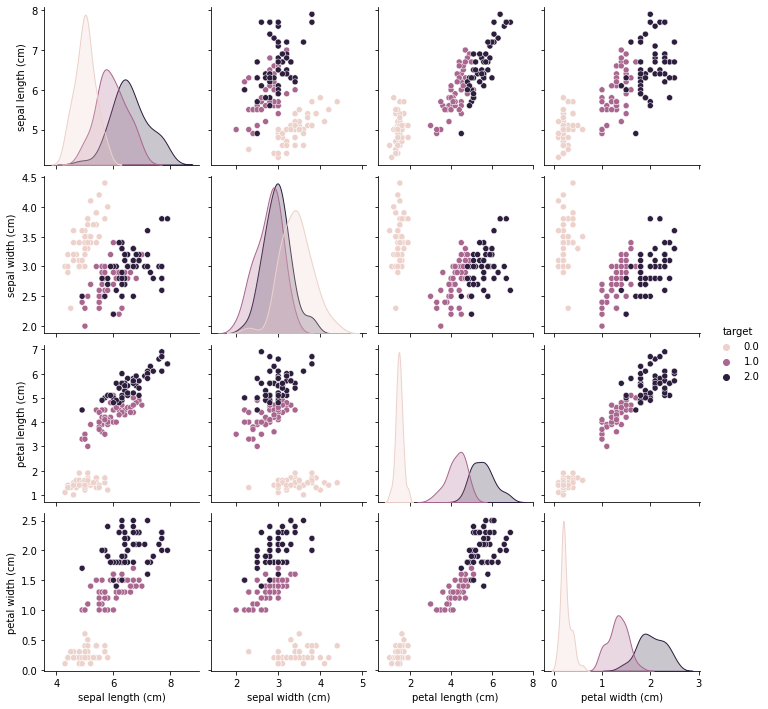

In [5]:
#2.5
import seaborn as sns
sns.pairplot(df, hue='target')

In [ ]:
#based on diagrams above, it can be linearly seperated.

In [7]:
#reading the csv file
iris =pd.read_csv('iris.csv')
print(iris.describe())
print(iris.info())
#no null entry 

       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Non

In [8]:
x = iris.drop('variety',axis=1)
y = iris['variety']

#2.6
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2)

#2.7
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train,y_train)

SVC(kernel='linear')

In [9]:
#2.8
y_predict =  clf.predict(x_test)
print(clf.score(x_test,y_test))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#print(scaler.fit_transform())

0.9666666666666667


Predicted   Setosa  Versicolor  Virginica
Actual                                   
Setosa          11           0          0
Versicolor       0           9          1
Virginica        0           0          9


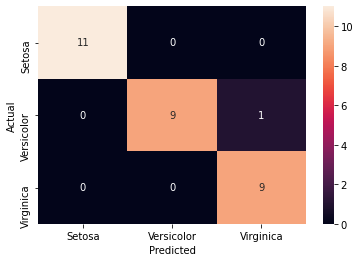

In [10]:
from sklearn.metrics import confusion_matrix
data = {'y_test':    y_test,
        'y_Predict': y_predict
        }

df = pd.DataFrame(data, columns=['y_test','y_Predict'])

confusion_matrix = pd.crosstab(df['y_test'], df['y_Predict'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
sns.heatmap(confusion_matrix, annot=True)
plt.show()


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, ))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      0.90      0.95        10
   Virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn import  datasets
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})